In [2]:
import pandas as pd
housing_data = pd.read_csv('/content/Housing.csv')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import learning_curve

def data_preprocessing(data):
  data_encoded = pd.get_dummies(data,drop_first=True)
  print(data_encoded.head())

  X = data_encoded.drop('price', axis=1)
  y = data_encoded['price']

  X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
  return X_train,X_test,y_train,y_test

def plot_actual_vs_predicted(model,X_test,y_test):
  y_pred = model.predict(X_test)
  plt.figure(figsize=(10,6))
  sns.scatterplot(x=y_test, y=y_pred)
  plt.title('Actual vs Predicted Prices')
  plt.xlabel('Actual Prices')
  plt.ylabel('Predicted Prices')
  plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'m--')
  plt.show()

def train_model(X_train, y_train):
  model = LinearRegression()
  model.fit(X_train,y_train)
  return model

def plot_learning_curve(model,X,y):
  train_sizes,train_scores,test_scores = learning_curve(
      model, X, y, cv=5, train_sizes=np.linspace(0.1,1.0,10),
      scoring = 'neg_mean_squared_error', shuffle=True)
  train_mean = -np.mean(train_scores,axis=1)
  train_std = np.std(train_scores,axis=1)
  test_mean = -np.mean(test_scores,axis=1)
  test_std = np.std(test_scores,axis=1)

  plt.figure(figsize=(10,6))
  plt.plot(train_sizes, train_mean, label='Training Error')
  plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
  plt.plot(train_sizes,test_mean,label='Validation Error')
  plt.fill_between(train_sizes, test_mean-test_std,test_mean + test_std,alpha=0.2)
  plt.xlabel("Training Set Size")
  plt.ylabel("MSE")
  plt.title("Linear Regression - Learning Curve")
  plt.legend()
  plt.show()

      price  area  bedrooms  bathrooms  stories  parking  mainroad_yes  \
0  13300000  7420         4          2        3        2          True   
1  12250000  8960         4          4        4        3          True   
2  12250000  9960         3          2        2        2          True   
3  12215000  7500         4          2        2        3          True   
4  11410000  7420         4          1        2        2          True   

   guestroom_yes  basement_yes  hotwaterheating_yes  airconditioning_yes  \
0          False         False                False                 True   
1          False         False                False                 True   
2          False          True                False                False   
3          False          True                False                 True   
4           True          True                False                 True   

   prefarea_yes  furnishingstatus_semi-furnished  furnishingstatus_unfurnished  
0          True  

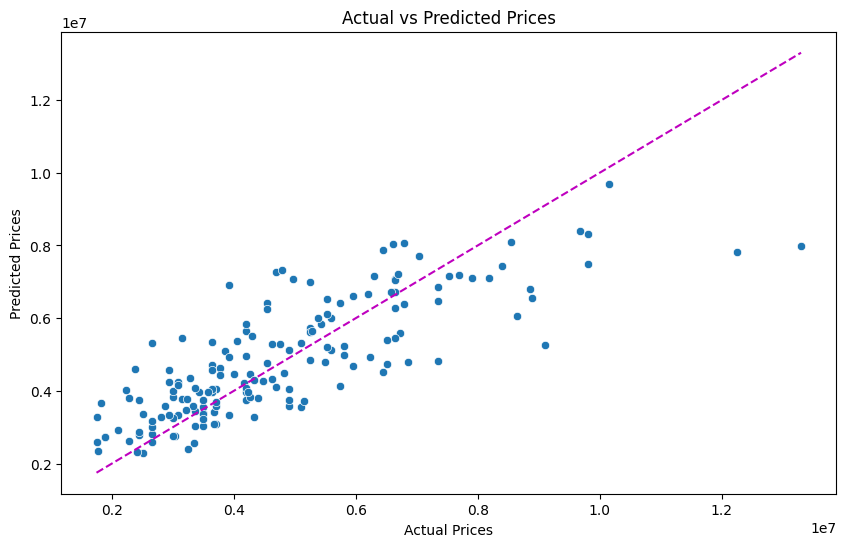

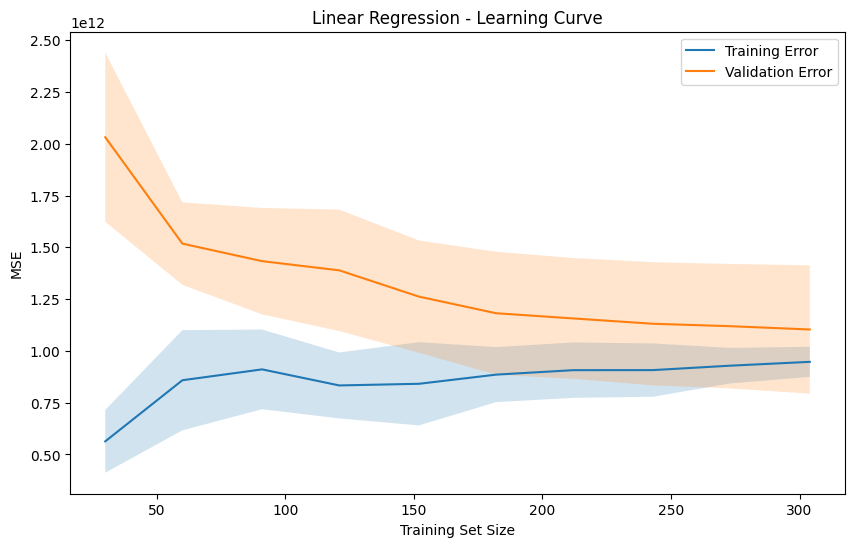

In [4]:
file_path = 'Housing.csv'
data = pd.read_csv(file_path)

X_train, X_test, y_train, y_test = data_preprocessing(data)
model = train_model(X_train, y_train)
plot_actual_vs_predicted(model,X_test,y_test)
plot_learning_curve(model,X_train,y_train)